#Author:Brian Erichsen Fagundes
#MSD CS 6017 - Summer - 2024
#Homework 2

Part 1: A/B Hypothesis testing

What can you conclude?

- Null hypotheses H0: The proportions of ad click for logos A and B are the same. H0 = pA = pB
- Alterntive hypotheses H1: The proportions of ad clicks for logos B is higher than for logo A. H1 = pB > pA

In [2]:
import math
from scipy.stats import norm
import statsmodels.api as sm

# Data
clicks_A = 500
views_A = 1000
clicks_B = 550
views_B = 1000

# p value for data a and data b
p_A = clicks_A / views_A
p_B = clicks_B / views_B

# In Binomial distribution mean = np and variance = p(1 - p)
# Var of sample proportion Var(p) = p(1 - p) / n
# Standard Error is the square root of the combined variance
# which simplified becomes sqrt of p_pool * ( 1 - p_pool) * (1 / popA + 1/ popB))
# z score is Z = (pB - pA) / SE

# pooled proportion
p_pooled = (clicks_A + clicks_B) / (views_A + views_B)

# Standard Error
SE = math.sqrt(p_pooled * (1 - p_pooled) * (1/views_A + 1/views_B))

Z = (p_B - p_A) / SE

# Cumulative Distribution Function - prob that  normally distributed
# random var is less or equal than given value

# One sided p-value // sees right of Z which is chance of
# observing an extreme value if H0 is true
p_value_one_sided = 1 - norm.cdf(Z)
p_value_two_sided = p_value_one_sided * 2

print(f"Pooled Proportion: {p_pooled}")
print(f"Stadandard Error: {SE}")
print(f"Z Value: {Z}")
print(f"One-sided p-value: {p_value_one_sided}")
print(f"Two-sided p-value: {p_value_two_sided}")

# Comfirming the results
count = [clicks_B, clicks_A]
nobs = [views_B, views_A]
z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')
print(f"Z value (statsmodels): {z_stat}")
print(f"One-sided p-value (statsmodels): {p_value}")

# Significance levels
alpha_5 = 0.05
# alpha_1 = 0.01

# Conclusions
if p_value < alpha_5:
    print("Reject the null hypothesis at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis at the 5% significance level")



Pooled Proportion: 0.525
Stadandard Error: 0.022332711434127295
Z Value: 2.238868314198227
One-sided p-value: 0.012582242850159187
Two-sided p-value: 0.025164485700318373
Z value (statsmodels): 2.238868314198227
One-sided p-value (statsmodels): 0.0125822428501592
Reject the null hypothesis at the 5% significance level.


What can you conclude?

Reject the null hypothesis at the 5% significance level.


Part 2: Regression of real estate data

Task 1: Import the data

In [3]:
import pandas as pd

# load file into objects
realEstate1 = pd.read_csv('realEstate1.csv')
realEstate2 = pd.read_csv('realEstate2.csv')

# concatenate the files data
realEstate = pd.concat(
    [realEstate1, realEstate2]
)

# check first entries of combined dataframe
print(realEstate.head())

# Check for missing values and data types
print(realEstate.info())
print(realEstate.isnull().sum())

    ListNo    Access  AdditInfo  Acres             ListAgt  \
0  1397571  Concrete        NaN   0.29          Liz Slager   
1  1394021   Asphalt        NaN   0.01      Angela Carlson   
2  1393604       NaN        NaN   0.11     Rachel Kitterer   
3  1393602  Concrete        NaN   0.14     Rachel Kitterer   
4  1393829   Asphalt        NaN   0.01  T. Carter Maudsley   

                 AirType                                          Amenities  \
0  Central Air; Electric  See Remarks; Cable Tv Available; Cable Tv Wire...   
1  Central Air; Electric          Cable Tv Available; Electric Dryer Hookup   
2  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
3  Central Air; Electric              Cable Tv Wired; Electric Dryer Hookup   
4  Central Air; Electric                                     Cable Tv Wired   

   Area  BackDim                            Basemnt  ...  WinEvp1 WinEvp2  \
0   101      0.0  Daylight; Entrance; Full; Walkout  ...        0       0  

Task 2: Clean the data

In [4]:
# Filter listing by price between 200,000 and 1 M

realEstate = realEstate[(realEstate['LstPrice'] >= 200000) & (realEstate['LstPrice'] <= 1000000)]

# Keep only relevent columns
columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
realEstate = realEstate[columns_to_keep]
# print(realEstate.columns)

# Convert any numbers read as string to numerical value
realEstate['TotSqf'] = realEstate['TotSqf'].str.replace(',', '').astype(int)

# 0 for condo and 1 for family house
realEstate['Prop_Type_num'] = realEstate['PropType'].apply(lambda x: 1 if 'Single Family' in x else 0)

# Remove listing with erronous longitude = 0
realEstate = realEstate[realEstate['Longitude'] != 0]

# Remove unreasonably large taxes values
realEstate = realEstate[realEstate['Taxes'] <= 20000]

# Display the cleaned dataframe
display(realEstate.head())

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,Prop_Type_num
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,5415,1998,1
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965,0
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,1702,1940,1
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,1756,1940,1
5,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,1368,1976,0


Task 3: Exploratory data analysis

Describing your findings.

The dataset contains 260 items and 16 variables
            Acres        Deck    GaragCap    Latitude   Longitude  \
count  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     0.130615    0.742308    1.273077   40.777502 -111.875672   
std      0.123752    1.242327    0.973811    0.005816    0.013993   
min      0.000000    0.000000    0.000000   40.769424 -111.913645   
25%      0.047500    0.000000    0.000000   40.772445 -111.886563   
50%      0.110000    1.000000    1.000000   40.775731 -111.874067   
75%      0.160000    1.000000    2.000000   40.782035 -111.865986   
max      0.690000   16.000000    5.000000   40.791059 -111.843083   

             LstPrice       Patio    PkgSpacs      SoldPrice        Taxes  \
count      260.000000  260.000000  260.000000     260.000000   260.000000   
mean    463442.165385    0.834615    1.038462  450714.384615  3029.373077   
std     200326.159745    3.379411    1.581280  190064.385847  1684.241154   
min     200000.000000 

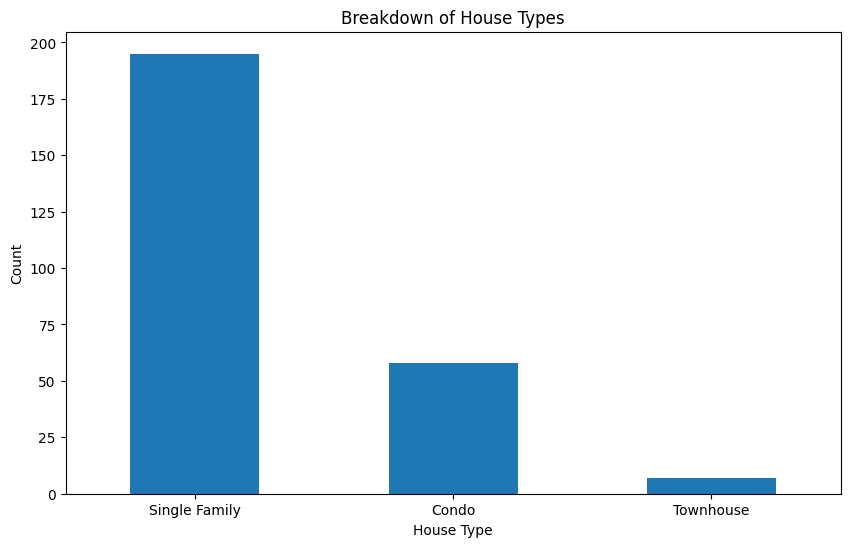

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data description
num_items = realEstate.shape[0]
num_variables = realEstate.shape[1]
print(f'The dataset contains {num_items} items and {num_variables} variables')

# Check if values are reasonable
print(realEstate.describe())

# Bar chart for the breakdown of house types
house_type_count = realEstate['PropType'].value_counts()
plt.figure(figsize=(10, 6))
house_type_count.plot(kind='bar')
plt.title('Breakdown of House Types')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.xticks(rotation =0)
plt.show()

Findings: The dataset consists of 260 houses and 16 attributes such as LstPrice, SoldPrice, and among others Taxes. The min and max values provided above seem reasonable.

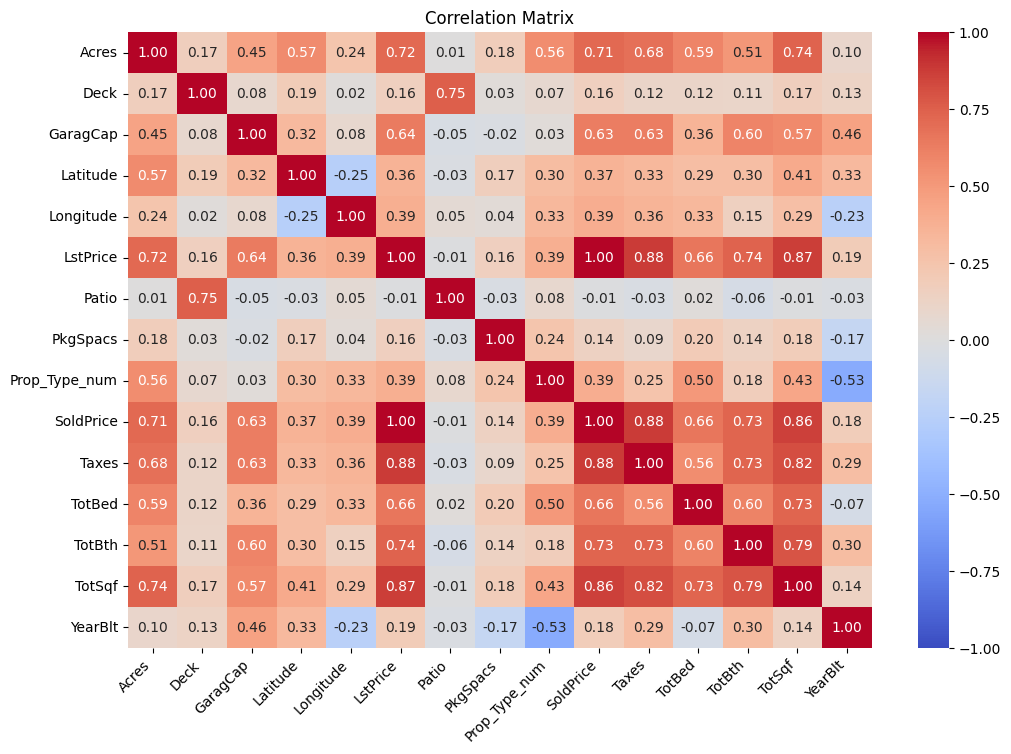

In [6]:
# Correlation matrix and heat map

# Keeping only numerical values and filtering out string ones
columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio',
'PkgSpacs', 'Prop_Type_num', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf',
'YearBlt']
realEstate = realEstate[columns_to_keep]

correlational_matrix = realEstate.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlational_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

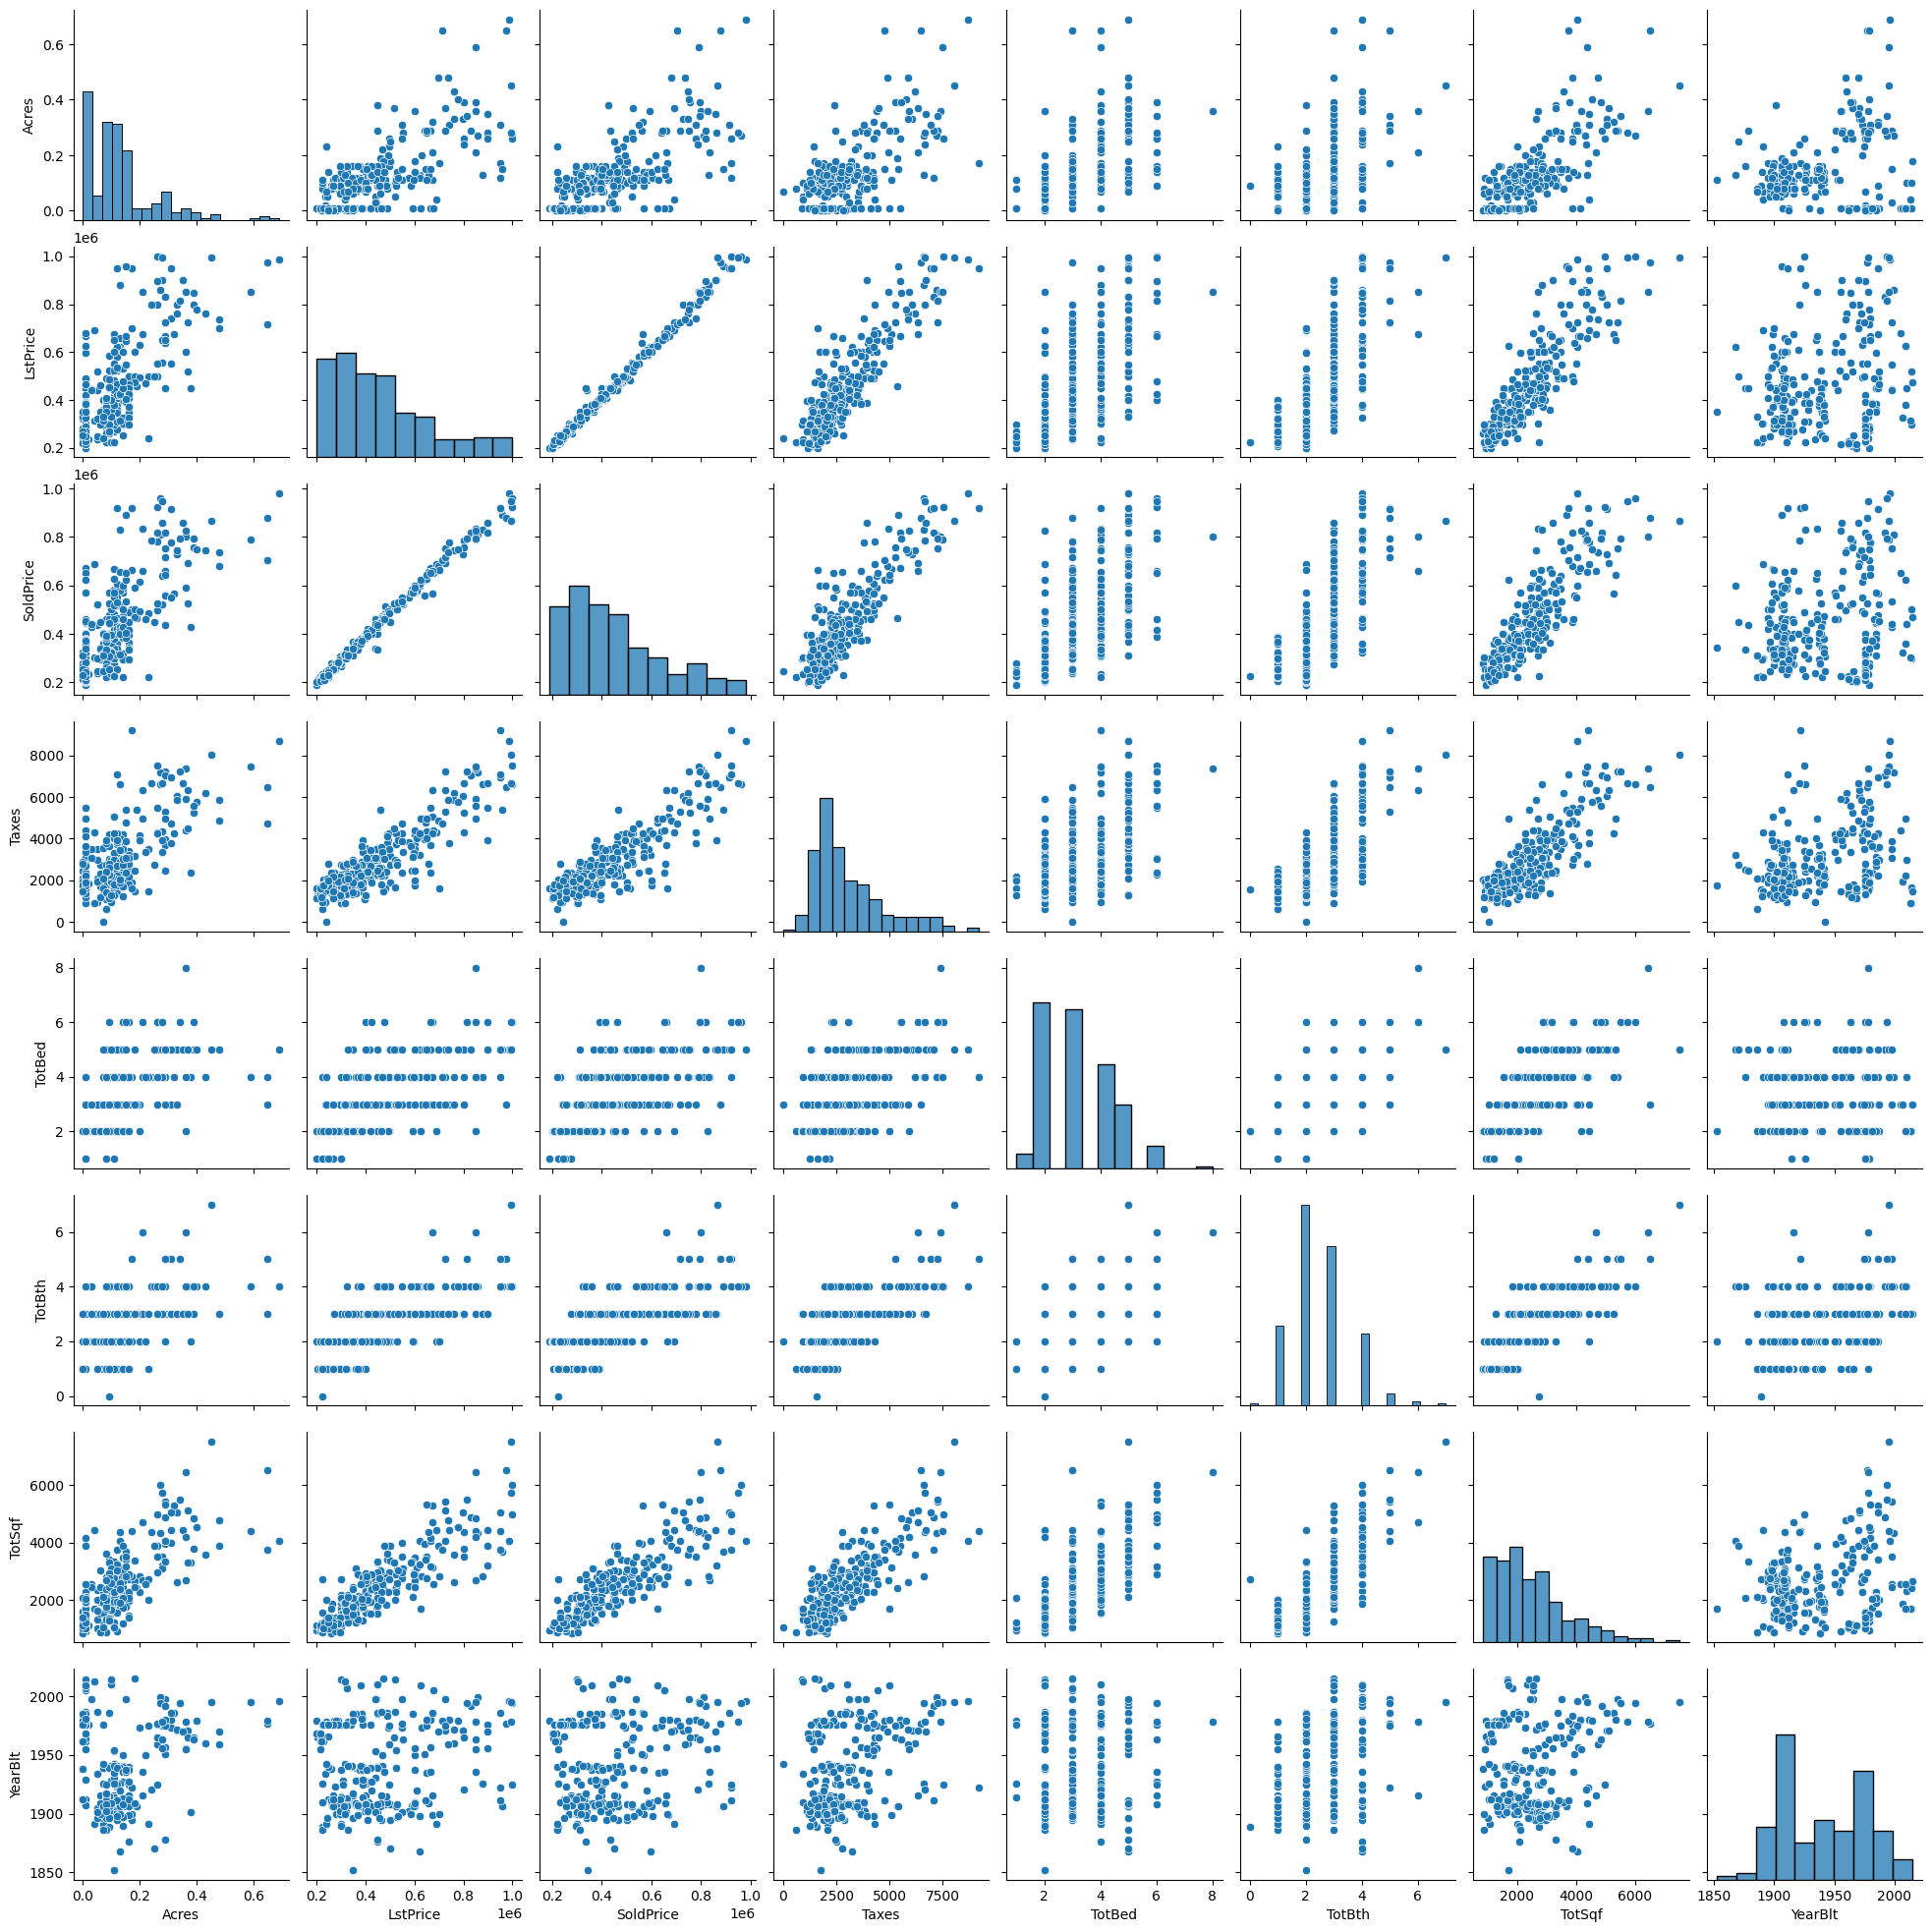

Columns with strong correlations:
                  Acres      Deck  GaragCap  Latitude  Longitude  LstPrice  \
Acres          1.000000       NaN       NaN       NaN        NaN  0.718336   
Deck                NaN  1.000000       NaN       NaN        NaN       NaN   
GaragCap            NaN       NaN       1.0       NaN        NaN       NaN   
Latitude            NaN       NaN       NaN       1.0        NaN       NaN   
Longitude           NaN       NaN       NaN       NaN        1.0       NaN   
LstPrice       0.718336       NaN       NaN       NaN        NaN  1.000000   
Patio               NaN  0.751281       NaN       NaN        NaN       NaN   
PkgSpacs            NaN       NaN       NaN       NaN        NaN       NaN   
Prop_Type_num       NaN       NaN       NaN       NaN        NaN       NaN   
SoldPrice      0.711958       NaN       NaN       NaN        NaN  0.995096   
Taxes               NaN       NaN       NaN       NaN        NaN  0.882305   
TotBed              NaN       

In [22]:
# Scatter plot matrix
columns_to_keep = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
sns.pairplot(realEstate[columns_to_keep])
plt.show()

# Describe findings
strong_correlations = correlational_matrix[correlational_matrix.abs() > 0.7]
print("Columns with strong correlations:")
print(strong_correlations)

Findings:
There are several attributes that influence the total sold price such as LstPrice, TotSqf, Taxes, YearBlt.
List price dictates a baseline for how much the house is worth hence a positive correlation between total sold price and its listing price as well.
To Square Feet and sold price have a positive relationship which makes sense since larger houses tend to sell for a higher price.

Task 4: Geospatial plot

In [8]:
import folium
from folium import plugins

# calculates the center of the map
center_lat = realEstate['Latitude'].mean()
center_lon = realEstate['Longitude'].mean()

# Create folium map centered around the average latidude and longitude
# zoom start param sets initial zoom level of map
m = folium.Map(location=[center_lat, center_lon], zoom_control=13)

# for each row of data / '_' ignores the index
for _, row in realEstate.iterrows():
    # adds circle marker and its details
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill='True',
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Sold Price: ${row["SoldPrice"]}'
    ).add_to(m)
# saves map into html file to display it
m.save('house_prices_map.html')
m  # display map in the jupyter note

- to display map on github website -- use  https://nbviewer.org/
or visit https://nbviewer.org/github/BrianErichsen/6017/blob/main/HW2/linear_regression.ipynb

Analysis:
In the north, east location of Salt Lake City, the more expensive the price of the houses get. Note that the price of sold house tend to be higher the closer they get to Wasatch mountains in the map.


Task 5: Simple Linear Regression

In [9]:
import statsmodels.api as sm

x = realEstate['LstPrice'] # independent
y = realEstate['SoldPrice'] # dependent

# adds constant to indepedent var
# Defines intercept beta 0
x = sm.add_constant(x)

# does the Ordinary Least Square regression model
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.97e-261
Time:                        14:25:38   Log-Likelihood:                -2927.2
No. Observations:                 260   AIC:                             5858.
Df Residuals:                     258   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+04   2948.953      4.465      0.0

R-squared: 0.990. This suggests that 99% of the variance in the sold price is explained by the list price.
Coefficient (beta_1): 0.9441. This implies that for every dollar increase in list price, the sold price increases by $0.95 on average.

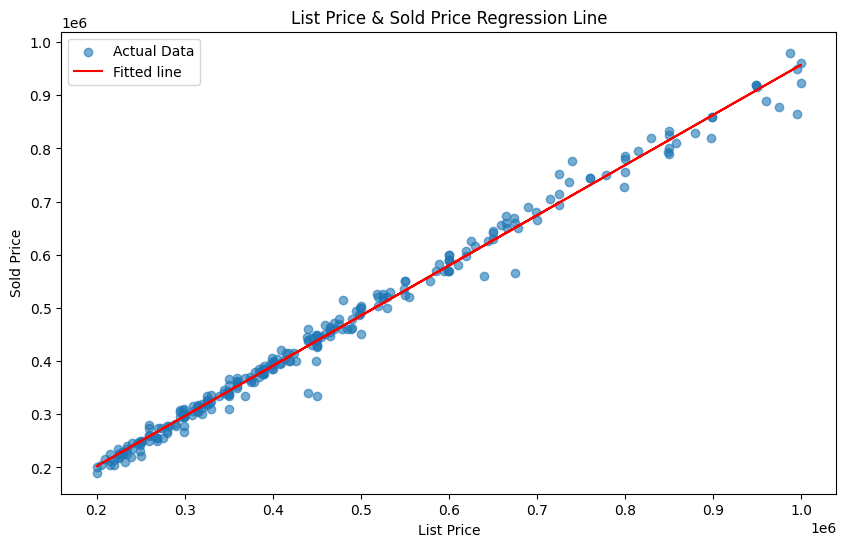

In [10]:
# plotting results
plt.figure(figsize=(10, 6))
plt.scatter(realEstate['LstPrice'], realEstate['SoldPrice'], alpha = 0.6, label='Actual Data')
plt.plot(realEstate['LstPrice'], model.predict(x), color='red', label='Fitted line')
plt.title('List Price & Sold Price Regression Line')
plt.xlabel('List Price')
plt.ylabel('Sold Price')
plt.legend()
plt.show()

Task 6: Multilinear Regression

In [15]:
# select predictors excluding list price and prop type
predictive_vars = ['TotSqf', 'GaragCap', 'Latitude', 'Longitude', 'Acres', 'Deck', 'Patio', 'PkgSpacs', 'Taxes', 'TotBed', 'TotBth', 'YearBlt']

# Defines dependent and independent variables
x = realEstate[predictive_vars]
y = realEstate['SoldPrice']

# add constant for the intercept term
x = sm.add_constant(x)

# fits the multilinear regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.50e-95
Time:                        14:59:01   Log-Likelihood:                -3279.3
No. Observations:                 260   AIC:                             6585.
Df Residuals:                     247   BIC:                             6631.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+08   5.25e+07      2.049      0.0

Analysis:
- The variables that best predict the sold price in this model seems to be to square foot, garage space, longitude, altidude and taxes; all of those variables have a consideralbe low p value.

-  To Square foot coefficient of 41.4077. That means that the price may go up $41.41 per each square foot.
- Garage space coefficient of 23,810.00. That means that each additional garage space adds about $23,810.00 to the total sold price.
- Latitude coefficient of 1,528,000.00 and Longitude coefficient of 1,513,000.00 That means that moving 1 degree north increases or higher latitude adds roughly 1.5 million USD to the total sold price, holding all other variables constant.

Model's R-Squared: 0.853:
- This indicates that about 85% of the variability in the sold price is explained the multilinear model. This is a great fit, however it is not as high as the simple linear regression where the list price alone explains about 99% of the sold price.


Task 7: Incorporating a categorical variable

In [19]:
# mapping for prop_type already done at task 2
# build the 1st model soldprice for dependent var and prop type for independent
x = realEstate['Prop_Type_num'] # independent
y = realEstate['SoldPrice'] # dependent

# adds constant to independent var for the intercept term
x = sm.add_constant(x)

# fits the 1st regression model
model = sm.OLS(y, x).fit()

# sets independent variables for second model and adds its constant
x2 = realEstate[['Prop_Type_num', 'TotSqf']]
x2 = sm.add_constant(x2)

# fits the second regression model
model2 = sm.OLS(y, x2).fit()

#prints summary for both models
print("Model 1 Summary:")
print(model.summary())
print("\nModel 2 Summary:")
print(model2.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     47.67
Date:                Wed, 29 May 2024   Prob (F-statistic):           3.90e-11
Time:                        15:32:54   Log-Likelihood:                -3506.7
No. Observations:                 260   AIC:                             7017.
Df Residuals:                     258   BIC:                             7025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.21e+05   2.

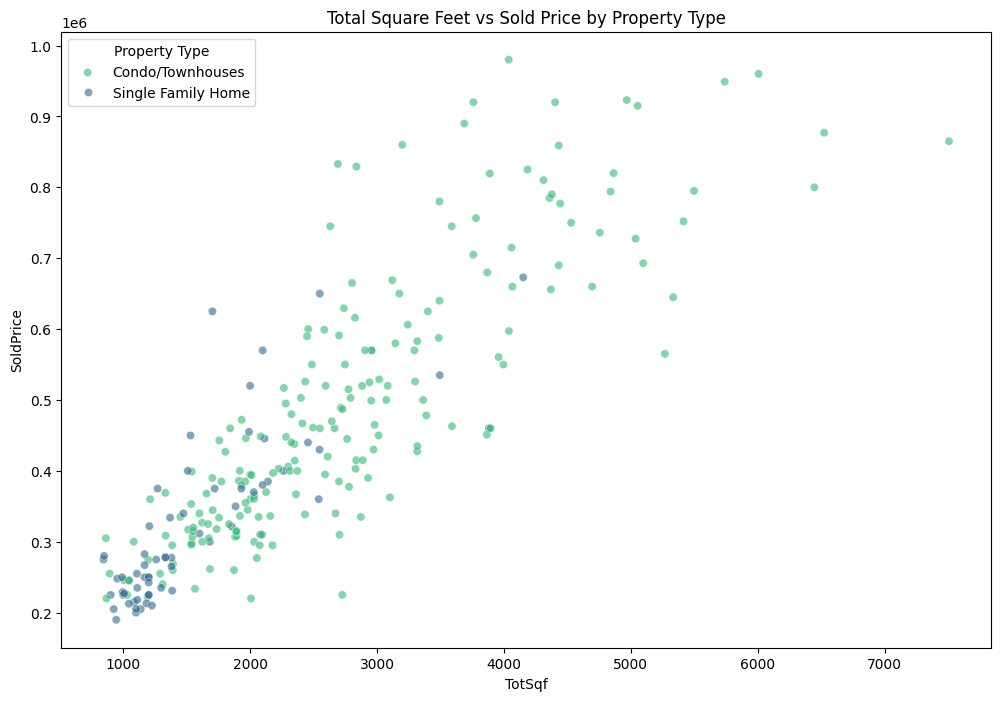

In [20]:
# Scatter plot of To square feet vs sold price colored by prop_type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=realEstate, x='TotSqf', y='SoldPrice', hue='Prop_Type_num', palette='viridis', alpha=0.6)
plt.title('Total Square Feet vs Sold Price by Property Type')
# location of legend
plt.legend(title='Property Type', loc='upper left', labels=['Condo/Townhouses', 'Single Family Home'])
plt.show()

Analysis:
When taking into account total square footage, property type is no longer predictive due to its relation to square footage. Larger properties sell for higher value. On task 6; we saw that square foot has a p value of 0.00 and when including square foot into the model, the p value of property changes from 0.00 to 0.422 indicating that most variance in sold price comes from square footage.